In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [3]:
cryptos=['BTC-USD','ETH-USD','XRP-USD','LTC-USD','DOGE-USD']
data=pd.DataFrame()
for c in cryptos:
    data[c]=wb.DataReader(c,data_source='yahoo',start='2018-1-1')['Adj Close']

In [4]:
data

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,DOGE-USD
Date,,,,,
2017-12-31,14156.400391,756.732971,2.300570,232.095993,0.008972
2018-01-01,13657.200195,772.640991,2.391030,229.033005,0.008909
2018-01-02,14982.099609,884.443970,2.480900,255.684006,0.009145
2018-01-03,15201.000000,962.719971,3.105370,245.367996,0.009320
2018-01-04,15599.200195,980.921997,3.196630,241.369995,0.009644
...,...,...,...,...,...
2021-04-15,61572.789062,2431.946533,1.557527,310.612732,0.365870
2021-04-16,60683.820312,2344.895020,1.560055,304.759918,0.284173
2021-04-17,56216.183594,2237.136963,1.405998,273.098816,0.320475


In [5]:
#Predicting the price of BITCOIN 

In [6]:
mydata=pd.DataFrame()
crypto="BTC-USD"
mydata[crypto]=wb.DataReader(crypto,data_source="yahoo",start="2018-1-1")['Adj Close']

In [7]:
mydata.head()

,BTC-USD
Date,
2017-12-31,14156.400391
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195


In [8]:
mydata.tail()

,BTC-USD
Date,
2021-04-15,61572.789062
2021-04-16,60683.820312
2021-04-17,56216.183594
2021-04-18,55724.265625
2021-04-20,56414.566406


<AxesSubplot:xlabel='Date'>

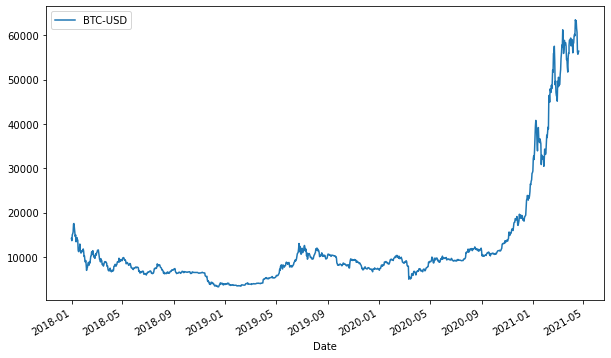

In [9]:
#Plot for bitcoin till date
mydata.plot(figsize=(10,6))

In [10]:
log_of_returns=np.log(1+mydata.pct_change())

In [11]:
log_of_returns

,BTC-USD
Date,
2017-12-31,NaN
2018-01-01,-0.035900
2018-01-02,0.092589
2018-01-03,0.014505
2018-01-04,0.025858
...,...
2021-04-15,-0.027887
2021-04-16,-0.014543
2021-04-17,-0.076472


<AxesSubplot:xlabel='Date'>

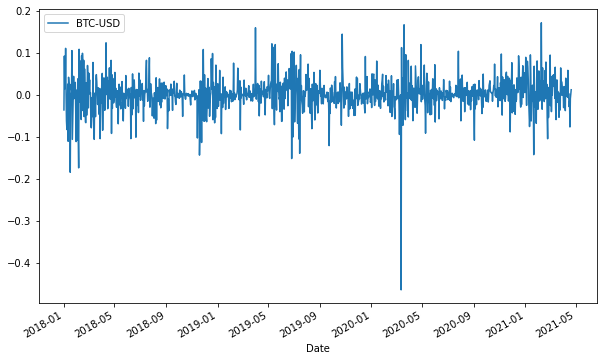

In [12]:
#Plot of log(returns) till date
log_of_returns.plot(figsize=(10,6))

In [13]:
#Calculating mean and variance of log of returns
mean=log_of_returns.mean()
print(mean)
var=log_of_returns.var()
print(var)

BTC-USD    0.00115
dtype: float64
BTC-USD    0.001618
dtype: float64


In [14]:
#Calculating drift which is the first component
#drift = mean - 0.5 * variance

In [15]:
drift=mean-(0.5*var)
drift

BTC-USD    0.000341
dtype: float64

In [16]:
stdev=log_of_returns.std()
stdev

BTC-USD    0.040226
dtype: float64

In [17]:
np.array(drift)
drift.values

array([0.00034115])

In [18]:
stdev.values

array([0.04022605])

In [19]:
#Calculating volatility of cryptocurrency , which is the second component
days=100
iterations=10

In [20]:
daily_return=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(days,iterations)))

In [21]:
daily_return

array([[0.96374884, 1.00073439, 1.00665076, 0.99822369, 1.02967229,
        0.96229788, 0.95793636, 1.01084504, 1.00878321, 1.04336986],
       [1.02101318, 1.03199551, 0.98934787, 1.02046523, 1.00769745,
        1.01979367, 1.06085687, 1.01532035, 1.01239909, 1.04490591],
       [0.94921247, 1.02143417, 1.05097976, 0.96940806, 0.98210182,
        0.99658233, 0.99655205, 0.92978895, 0.97815185, 1.02219436],
       [1.01665358, 1.03012151, 0.9875704 , 0.98975525, 1.00353507,
        1.10543423, 0.9889944 , 0.98527525, 0.9568135 , 0.98078306],
       [1.08274771, 1.03207423, 0.97298955, 0.98505973, 1.03837481,
        1.03242661, 1.02801733, 1.00391666, 0.96546356, 1.03316682],
       [1.04438488, 1.05592051, 0.98525841, 1.01195695, 0.98224567,
        1.07366177, 0.97947322, 1.06344685, 1.03892915, 1.01360996],
       [1.03960312, 1.0187802 , 1.00469417, 1.08802629, 0.95660193,
        1.03104183, 1.02696533, 0.99701389, 1.09497697, 0.98099998],
       [0.96685232, 0.97554264, 0.9707254

In [22]:
recent_price=mydata.iloc[-1]
recent_price

BTC-USD    56414.566406
Name: 2021-04-20 00:00:00, dtype: float64

In [23]:
predicted_price=np.zeros_like(daily_return)
predicted_price

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [24]:
predicted_price[0]=recent_price
predicted_price

array([[56414.56640625, 56414.56640625, 56414.56640625, 56414.56640625,
        56414.56640625, 56414.56640625, 56414.56640625, 56414.56640625,
        56414.56640625, 56414.56640625],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,     0.        ,
   

In [25]:
for day in range(1,days):
    predicted_price[day]=predicted_price[day-1]*daily_return[day]

In [26]:
predicted_price

array([[ 56414.56640625,  56414.56640625,  56414.56640625,
         56414.56640625,  56414.56640625,  56414.56640625,
         56414.56640625,  56414.56640625,  56414.56640625,
         56414.56640625],
       [ 57600.01600572,  58219.57927251,  55813.63085423,
         57569.10365963,  56848.81464028,  57531.21783289,
         59847.78020598,  57278.85706683,  57114.0555147 ,
         58947.91367389],
       [ 54674.65333911,  59467.46759963,  58658.99655697,
         55807.9528997 ,  55831.32426262,  57334.59486918,
         59641.42804146,  53257.24815963,  55866.21896744,
         60256.22507595],
       [ 55585.18201613,  61258.71769751,  57929.88890343,
         55236.21415047,  56028.69176067,  63379.62363184,
         58985.03851816,  52473.04849052,  53453.55249539,
         59098.28452367],
       [ 60184.72838286,  63223.54360667,  56365.1762575 ,
         54410.97007566,  58178.7821946 ,  65434.81000036,
         60637.64185601,  52678.56774533,  51607.4573367 ,
         61

The plot of predicted prices (for next 100 days) of BITCOIN by performing 10 simulations 


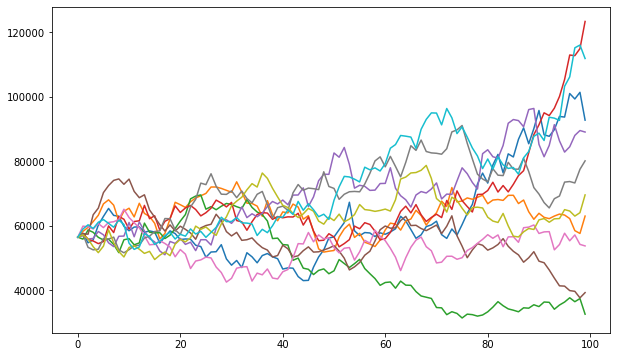

In [27]:
print("The plot of predicted prices (for next 100 days) of BITCOIN by performing 10 simulations ")
plt.figure(figsize=(10,6))
plt.plot(predicted_price);

In [28]:
#Predicting Bitcoin prices for next 6 months(180 days)

In [29]:
days=180

In [30]:
daily_return=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(days,iterations)))

In [31]:
predicted_price=np.zeros_like(daily_return)
predicted_price[0]=recent_price
for day in range(1,days):
    predicted_price[day]=predicted_price[day-1]*daily_return[day]
predicted_price

array([[ 56414.56640625,  56414.56640625,  56414.56640625, ...,
         56414.56640625,  56414.56640625,  56414.56640625],
       [ 55355.69708378,  56438.61632107,  57273.64464686, ...,
         53553.61490177,  53725.6144569 ,  57122.26542568],
       [ 55286.42816293,  55701.55348326,  56434.2642161 , ...,
         53497.26916313,  56637.96835244,  57654.91416744],
       ...,
       [ 90702.57775309,  55230.1164305 , 233154.34391862, ...,
         59985.36563648,  51639.99171346,  78137.80625752],
       [ 95382.80932735,  53529.61104432, 247761.9574002 , ...,
         60333.6948153 ,  51955.05684552,  81310.74667457],
       [ 89856.9628529 ,  52338.37882049, 241067.31712399, ...,
         56090.95910047,  54412.29968858,  78453.22202197]])

The plot of predicted prices (for next 180 days) of BITCOIN by performing 10 simulations 


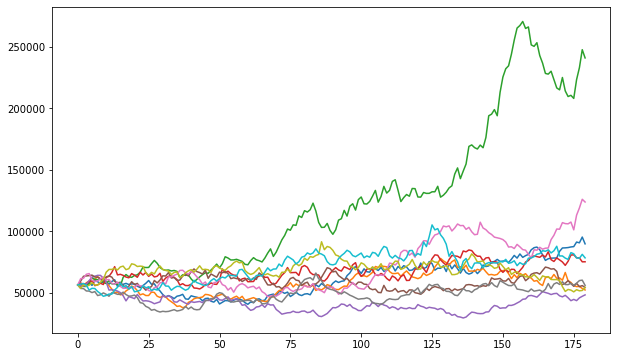

In [32]:
print("The plot of predicted prices (for next 180 days) of BITCOIN by performing 10 simulations ")
plt.figure(figsize=(10,6))
plt.plot(predicted_price);

In [33]:
#Predicting the price of ETHEREUM

In [34]:
mydata=pd.DataFrame()
crypto="ETH-USD"
mydata[crypto]=wb.DataReader(crypto,data_source="yahoo",start="2018-1-1")['Adj Close']

In [35]:
mydata.tail()

,ETH-USD
Date,
2021-04-15,2431.946533
2021-04-16,2344.895020
2021-04-17,2237.136963
2021-04-18,2166.188721
2021-04-20,2282.008057


<AxesSubplot:xlabel='Date'>

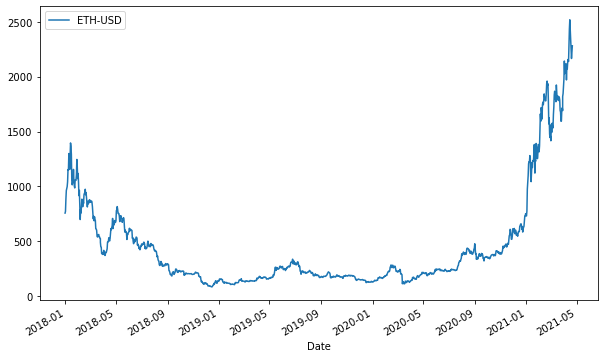

In [36]:
#Plot for ethereum till date
mydata.plot(figsize=(10,6))

In [37]:
log_of_returns=np.log(1+mydata.pct_change())
log_of_returns

,ETH-USD
Date,
2017-12-31,NaN
2018-01-01,0.020804
2018-01-02,0.135145
2018-01-03,0.084803
2018-01-04,0.018730
...,...
2021-04-15,-0.035216
2021-04-16,-0.036451
2021-04-17,-0.047044


In [38]:
#Calculating mean and variance of log of returns
mean=log_of_returns.mean()
print(mean)
var=log_of_returns.var()
print(var)

ETH-USD    0.000918
dtype: float64
ETH-USD    0.002654
dtype: float64


In [39]:
#Calculating drift which is the first component
#drift = mean - 0.5 * variance

In [40]:
drift=mean-(0.5*var)
drift

ETH-USD   -0.000409
dtype: float64

In [41]:
stdev=log_of_returns.std()
stdev

ETH-USD    0.051517
dtype: float64

In [42]:
np.array(drift)
drift.values

array([-0.0004087])

In [43]:
stdev.values

array([0.05151697])

In [44]:
#Calculating volatility of cryptocurrency , which is the second component
days=100
iterations=10

In [45]:
daily_return=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(days,iterations)))
daily_return

array([[0.982956  , 0.97027904, 1.0258278 , 1.0085583 , 0.99257982,
        0.93292225, 1.00781362, 0.95539849, 0.9635732 , 1.01061263],
       [0.99897379, 1.02737997, 1.06945792, 0.94257345, 0.92683653,
        1.01445272, 0.98474009, 0.90730289, 0.92868853, 1.03062705],
       [1.04651576, 0.97341025, 0.99512442, 1.03608416, 0.9381741 ,
        1.03632459, 1.01910535, 1.01420429, 0.98690214, 1.02238818],
       [0.95749821, 0.97960675, 1.00848876, 0.90487983, 0.93452761,
        0.98971729, 1.0672665 , 0.99496224, 0.99625483, 0.92735805],
       [1.04400836, 1.08603801, 1.02164808, 1.0246869 , 1.05271993,
        0.96973181, 1.09981108, 0.96049463, 1.00299102, 0.94773174],
       [1.07029967, 1.10771722, 1.03842372, 1.0015551 , 0.9300215 ,
        0.94395577, 0.94113074, 1.05844029, 1.00411952, 0.95247093],
       [0.91316996, 0.94123647, 0.91075439, 1.0295979 , 1.10328644,
        1.0038711 , 0.96756083, 0.94228468, 1.03889999, 1.0519794 ],
       [1.04705204, 1.02779168, 1.0476845

In [46]:
recent_price=mydata.iloc[-1]
recent_price

ETH-USD    2282.008057
Name: 2021-04-20 00:00:00, dtype: float64

In [47]:
predicted_price=np.zeros_like(daily_return)
predicted_price

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [48]:
predicted_price[0]=recent_price
predicted_price

array([[2282.00805664, 2282.00805664, 2282.00805664, 2282.00805664,
        2282.00805664, 2282.00805664, 2282.00805664, 2282.00805664,
        2282.00805664, 2282.00805664],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0

In [49]:
for day in range(1,days):
    predicted_price[day]=predicted_price[day-1]*daily_return[day]

In [50]:
predicted_price

array([[2282.00805664, 2282.00805664, 2282.00805664, 2282.00805664,
        2282.00805664, 2282.00805664, 2282.00805664, 2282.00805664,
        2282.00805664, 2282.00805664],
       [2279.66623177, 2344.48936729, 2440.51159708, 2150.9602032 ,
        2115.04842554, 2314.98929046, 2247.18482091, 2070.47249685,
        2119.27471289, 2351.89922179],
       [2385.70663844, 2282.14997675, 2428.61268035, 2228.57579168,
        1984.2836457 , 2399.08033238, 2290.11806993, 2099.88208534,
        2091.51675629, 2404.55396686],
       [2284.30983231, 2235.60952854, 2449.2285922 , 2016.59328624,
        1854.36784646, 2374.41128048, 2444.16629394, 2089.30337549,
        2083.68367044, 2229.88248171],
       [2384.8385712 , 2427.95691774, 2502.24967748, 2066.37672666,
        1952.12999634, 2302.54213928, 2688.12116978, 2006.76466793,
        2089.91600343, 2113.33041326],
       [2552.49194718, 2689.48968348, 2598.39541056, 2069.59013942,
        1815.52286587, 2173.49793907, 2529.87346047, 2124

The plot of predicted prices (for next 100 days) of ETHEREUM by performing 10 simulations 


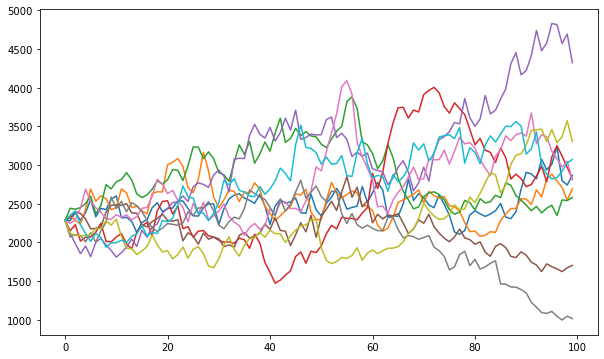

In [51]:
print("The plot of predicted prices (for next 100 days) of ETHEREUM by performing 10 simulations ")
plt.figure(figsize=(10,6))
plt.plot(predicted_price);

In [52]:
#Predicting ETHEREUM prices for next 6 months(180 days)

In [53]:
days=180

In [54]:
daily_return=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(days,iterations)))
predicted_price=np.zeros_like(daily_return)
predicted_price[0]=recent_price
for day in range(1,days):
    predicted_price[day]=predicted_price[day-1]*daily_return[day]
predicted_price

array([[2282.00805664, 2282.00805664, 2282.00805664, ..., 2282.00805664,
        2282.00805664, 2282.00805664],
       [2138.72798301, 2151.89342837, 2368.90473964, ..., 2498.41689636,
        2122.71402781, 2341.10937564],
       [2206.22064884, 2386.65585986, 2263.41924057, ..., 2658.97535491,
        2138.61003131, 2316.52444577],
       ...,
       [1650.07533152, 2799.13932728, 1615.72169066, ...,  447.87513854,
        1188.5870248 , 1445.81312699],
       [1732.67059717, 2905.11660441, 1578.70869248, ...,  475.31915261,
        1254.41303761, 1521.28334619],
       [1593.3787633 , 2879.317678  , 1465.90088471, ...,  455.88718222,
        1325.84865787, 1360.53888996]])

The plot of predicted prices (for next 180 days) of ETHEREUM by performing 10 simulations 


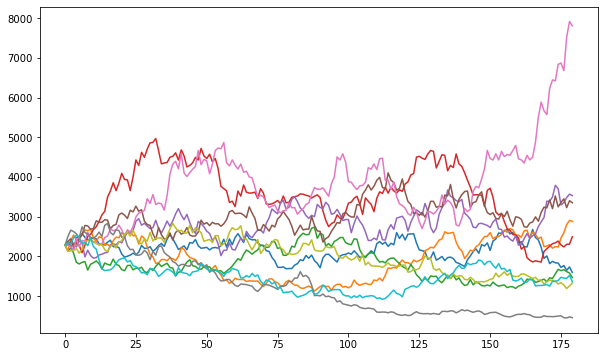

In [55]:
print("The plot of predicted prices (for next 180 days) of ETHEREUM by performing 10 simulations ")
plt.figure(figsize=(10,6))
plt.plot(predicted_price);

In [56]:
#Predicting the price of RIPPLE

In [57]:
mydata=pd.DataFrame()
crypto="XRP-USD"
mydata[crypto]=wb.DataReader(crypto,data_source="yahoo",start="2019-1-1")['Adj Close']
mydata.tail()

,XRP-USD
Date,
2021-04-15,1.557527
2021-04-16,1.560055
2021-04-17,1.405998
2021-04-18,1.315044
2021-04-20,1.383997


<AxesSubplot:xlabel='Date'>

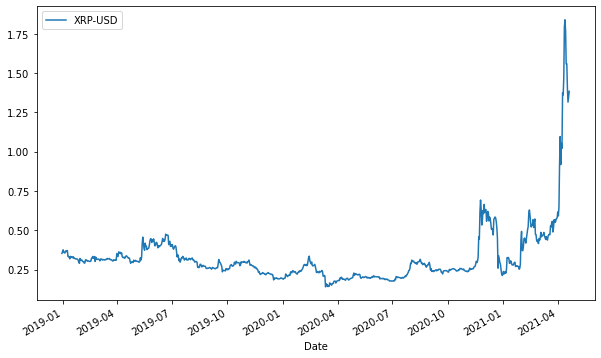

In [58]:
#Plot for Ripple till date
mydata.plot(figsize=(10,6))

In [59]:
log_of_returns=np.log(1+mydata.pct_change())
log_of_returns

,XRP-USD
Date,
2018-12-31,NaN
2019-01-01,0.033635
2019-01-02,0.028304
2019-01-03,-0.040848
2019-01-04,-0.009699
...,...
2021-04-15,-0.125656
2021-04-16,0.001622
2021-04-17,-0.103974


In [60]:
#Calculating mean and variance of log of returns
mean=log_of_returns.mean()
print(mean)
var=log_of_returns.var()
print(var)

XRP-USD    0.001633
dtype: float64
XRP-USD    0.003473
dtype: float64


In [61]:
#Calculating drift which is the first component
#drift = mean - 0.5 * variance

In [62]:
drift=mean-(0.5*var)
drift

XRP-USD   -0.000103
dtype: float64

In [63]:
stdev=log_of_returns.std()
stdev

XRP-USD    0.058931
dtype: float64

In [64]:
np.array(drift)
drift.values

array([-0.00010313])

In [65]:
stdev.values

array([0.05893142])

In [66]:
#Calculating volatility of cryptocurrency , which is the second component
days=100
iterations=10

In [67]:
daily_return=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(days,iterations)))
daily_return

array([[1.0070271 , 1.00600324, 0.93789016, 1.11363439, 1.10465267,
        1.04339583, 1.04315738, 0.94250837, 1.01267538, 1.10144913],
       [0.92499471, 0.98516244, 0.93313789, 1.01673494, 0.97979633,
        1.12006237, 1.05275855, 1.05035004, 0.98001806, 1.11287183],
       [0.99855739, 0.95155292, 1.05912376, 0.99894682, 0.95679108,
        0.97400339, 0.88974725, 0.99430181, 1.10483464, 0.97317624],
       [1.0028439 , 0.97059397, 1.04701021, 1.03360448, 1.0011008 ,
        0.96082671, 0.99556366, 1.06538338, 1.02257643, 0.96922042],
       [1.02977605, 0.9663754 , 1.08452647, 1.00678053, 0.97642672,
        0.95497301, 1.08915653, 1.03331851, 0.93718747, 0.91471804],
       [0.98169946, 0.98993696, 1.12423131, 0.90914087, 0.97792624,
        1.00778925, 0.932227  , 0.95222561, 1.01703167, 0.99470726],
       [1.04310598, 1.00693781, 0.89321162, 0.95740607, 0.94980454,
        0.97954373, 1.00429967, 1.01796253, 1.06279646, 0.97826646],
       [0.9730943 , 1.05260576, 0.9741944

In [68]:
recent_price=mydata.iloc[-1]
recent_price

XRP-USD    1.383997
Name: 2021-04-20 00:00:00, dtype: float64

In [69]:
predicted_price=np.zeros_like(daily_return)

In [70]:
predicted_price[0]=recent_price

In [71]:
for day in range(1,days):
    predicted_price[day]=predicted_price[day-1]*daily_return[day]

In [72]:
predicted_price

array([[1.38399684, 1.38399684, 1.38399684, 1.38399684, 1.38399684,
        1.38399684, 1.38399684, 1.38399684, 1.38399684, 1.38399684],
       [1.28018975, 1.36346171, 1.2914599 , 1.40715795, 1.35603503,
        1.55016279, 1.45701451, 1.45368114, 1.35634191, 1.5402111 ],
       [1.27834294, 1.29740597, 1.36781586, 1.40567597, 1.29744223,
        1.50986382, 1.29637466, 1.44539779, 1.49853352, 1.49889684],
       [1.28197842, 1.25925441, 1.43211716, 1.45291298, 1.29887045,
        1.45071749, 1.29062351, 1.53990279, 1.53236506, 1.45276143],
       [1.32015068, 1.21691248, 1.55316897, 1.4627645 , 1.26825181,
        1.38539606, 1.40569102, 1.59121005, 1.43611333, 1.32886709],
       [1.2959912 , 1.20466664, 1.74612118, 1.32985899, 1.24025673,
        1.39618725, 1.31042312, 1.51519096, 1.46057273, 1.32183374],
       [1.35185617, 1.21302438, 1.55965573, 1.27321507, 1.17800148,
        1.36762646, 1.31605751, 1.54240762, 1.55229153, 1.29310561],
       [1.31548353, 1.27683645, 1.5194079

The plot of predicted prices (for next 100 days) of RIPPLE by performing 10 simulations 


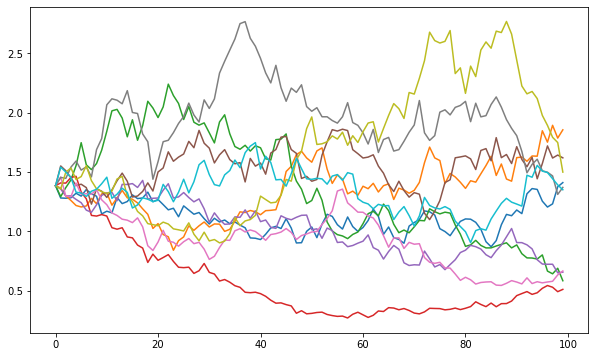

In [73]:
print("The plot of predicted prices (for next 100 days) of RIPPLE by performing 10 simulations ")
plt.figure(figsize=(10,6))
plt.plot(predicted_price);

In [74]:
#Predicting Ripple prices for next 6 months(180 days)

In [75]:
days=180

In [76]:
daily_return=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(days,iterations)))
predicted_price=np.zeros_like(daily_return)
predicted_price[0]=recent_price
for day in range(1,days):
    predicted_price[day]=predicted_price[day-1]*daily_return[day]
predicted_price

array([[1.38399684, 1.38399684, 1.38399684, ..., 1.38399684, 1.38399684,
        1.38399684],
       [1.22009991, 1.52916405, 1.23255306, ..., 1.42094791, 1.27032506,
        1.22062942],
       [1.29043157, 1.57791341, 1.21376693, ..., 1.43684709, 1.31946624,
        1.32917659],
       ...,
       [2.04019527, 1.28311731, 0.78364941, ..., 0.74264539, 1.61940561,
        1.57663638],
       [2.15511992, 1.27932368, 0.76094598, ..., 0.70934823, 1.4628798 ,
        1.73054056],
       [2.40468777, 1.14093529, 0.64857003, ..., 0.70430928, 1.35787281,
        1.87092131]])

The plot of predicted prices (for next 180 days) of RIPPLE by performing 10 simulations 


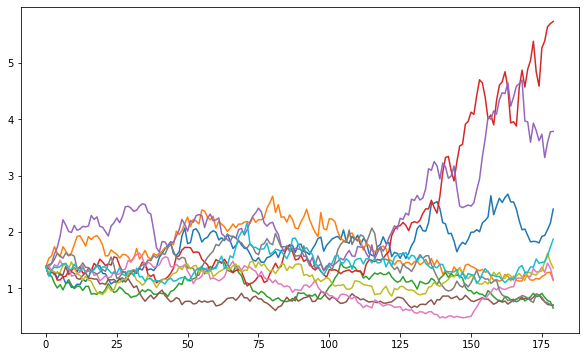

In [77]:
print("The plot of predicted prices (for next 180 days) of RIPPLE by performing 10 simulations ")
plt.figure(figsize=(10,6))
plt.plot(predicted_price);

In [78]:
#Predicting the price of LITECOIN

In [79]:
mydata=pd.DataFrame()
crypto="LTC-USD"
mydata[crypto]=wb.DataReader(crypto,data_source="yahoo",start="2019-1-1")['Adj Close']
mydata.tail()

,LTC-USD
Date,
2021-04-15,310.612732
2021-04-16,304.759918
2021-04-17,273.098816
2021-04-18,261.919220
2021-04-20,270.957611


<AxesSubplot:xlabel='Date'>

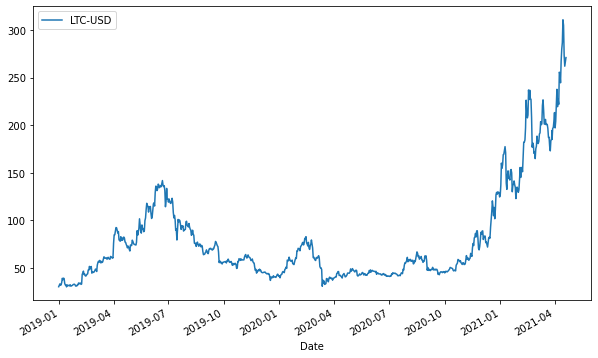

In [80]:
#Plot for Litecoin till date
mydata.plot(figsize=(10,6))

In [81]:
log_of_returns=np.log(1+mydata.pct_change())
log_of_returns

,LTC-USD
Date,
2018-12-31,NaN
2019-01-01,0.048424
2019-01-02,0.044455
2019-01-03,-0.042994
2019-01-04,0.011717
...,...
2021-04-15,0.080492
2021-04-16,-0.019023
2021-04-17,-0.109691


In [82]:
#Calculating mean and variance of log of returns
mean=log_of_returns.mean()
print(mean)
var=log_of_returns.var()
print(var)

LTC-USD    0.002611
dtype: float64
LTC-USD    0.00268
dtype: float64


In [83]:
#Calculating drift which is the first component
#drift = mean - 0.5 * variance

In [84]:
drift=mean-(0.5*var)
drift

LTC-USD    0.001271
dtype: float64

In [85]:
stdev=log_of_returns.std()
stdev

LTC-USD    0.051771
dtype: float64

In [86]:
np.array(drift)
drift.values

array([0.00127074])

In [87]:
stdev.values

array([0.05177083])

In [88]:
#Calculating volatility of cryptocurrency , which is the second component
days=100
iterations=10

In [89]:
daily_return=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(days,iterations)))
daily_return

array([[1.04950924, 0.93773135, 0.99427933, 1.07341809, 1.08357354,
        0.95093653, 0.97001483, 1.0224641 , 0.97917285, 1.0712765 ],
       [0.9792399 , 1.04031732, 0.93830946, 1.00076169, 0.9677531 ,
        1.02417001, 0.96071095, 0.980456  , 0.99565142, 1.01607902],
       [1.01013938, 0.9887815 , 1.03735308, 1.00712465, 0.94237508,
        0.89372153, 1.12240313, 0.96416984, 0.92194055, 1.0973945 ],
       [1.04660599, 0.9592862 , 0.96125006, 0.9875055 , 1.03206636,
        1.08749175, 1.04754941, 1.18564549, 1.02968959, 0.93319797],
       [1.02601161, 0.97650469, 1.05050944, 0.94757574, 0.9199846 ,
        0.97038338, 0.9840746 , 1.05777271, 1.07556824, 1.08639127],
       [1.08007545, 0.87526246, 0.95561025, 0.9037522 , 1.08029188,
        1.04283599, 0.96111326, 1.02179742, 0.9434362 , 1.01104723],
       [1.02917936, 0.94289948, 1.04011051, 1.07261351, 0.99999559,
        1.04341684, 0.95205347, 0.99776459, 0.85416568, 0.9220526 ],
       [1.20156622, 0.97226314, 0.9531775

In [90]:
recent_price=mydata.iloc[-1]
recent_price

LTC-USD    270.957611
Name: 2021-04-20 00:00:00, dtype: float64

In [91]:
predicted_price=np.zeros_like(daily_return)

In [92]:
predicted_price[0]=recent_price

In [93]:
for day in range(1,days):
    predicted_price[day]=predicted_price[day-1]*daily_return[day]

In [94]:
predicted_price

array([[270.95761108, 270.95761108, 270.95761108, 270.95761108,
        270.95761108, 270.95761108, 270.95761108, 270.95761108,
        270.95761108, 270.95761108],
       [265.3325052 , 281.88189577, 254.24209009, 271.16399576,
        262.22006736, 277.50665963, 260.31194387, 265.66201608,
        269.77933081, 275.31434509],
       [268.0228117 , 278.71960252, 263.73881586, 273.0959443 ,
        247.10965639, 248.0136757 , 292.17494184, 256.14330431,
        248.72050509, 302.12844692],
       [280.51427985, 267.37186728, 253.51895316, 269.68374829,
        255.03356462, 269.71282516, 306.06768652, 303.69515365,
        256.10491471, 281.94565406],
       [287.81090838, 261.08988356, 266.32405301, 255.54577793,
        234.62695218, 261.7248438 , 301.19343489, 321.24044427,
        275.4583133 , 306.30329695],
       [310.85749631, 228.5221735 , 254.50199468, 230.9500587 ,
        253.46559235, 272.9360862 , 289.48100475, 328.24265567,
        259.87734321, 309.68710102],
       [31

The plot of predicted prices (for next 100 days) of LITECOIN by performing 10 simulations 


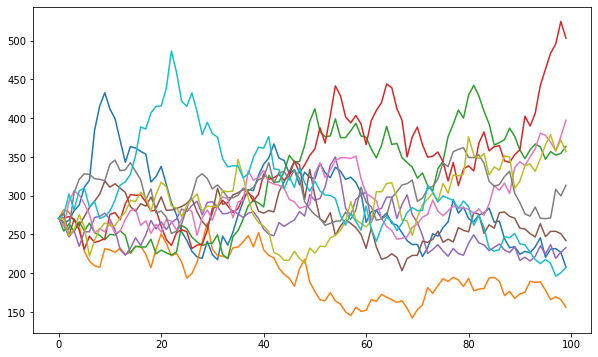

In [95]:
print("The plot of predicted prices (for next 100 days) of LITECOIN by performing 10 simulations ")
plt.figure(figsize=(10,6))
plt.plot(predicted_price);

In [96]:
#Predicting Litecoin prices for next 6 months(180 days)

In [97]:
days=180

In [98]:
daily_return=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(days,iterations)))
predicted_price=np.zeros_like(daily_return)
predicted_price[0]=recent_price
for day in range(1,days):
    predicted_price[day]=predicted_price[day-1]*daily_return[day]
predicted_price

array([[270.95761108, 270.95761108, 270.95761108, ..., 270.95761108,
        270.95761108, 270.95761108],
       [284.50328122, 244.11056426, 280.26733306, ..., 263.58687537,
        279.74959136, 256.05188948],
       [271.60757924, 219.46174218, 296.75524304, ..., 315.06891758,
        262.83651598, 245.24787456],
       ...,
       [648.36060373, 159.40890709, 678.34374218, ..., 490.73690259,
        291.80847813, 134.11332507],
       [639.35073947, 151.75833294, 634.48649359, ..., 511.38294938,
        297.84116475, 141.02006414],
       [598.83576448, 157.55478237, 667.60672674, ..., 513.96820171,
        299.00586379, 129.26807773]])

The plot of predicted prices (for next 180 days) of LITECOIN by performing 10 simulations 


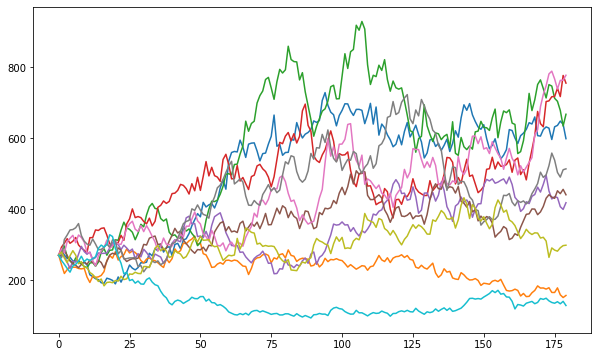

In [99]:
print("The plot of predicted prices (for next 180 days) of LITECOIN by performing 10 simulations ")
plt.figure(figsize=(10,6))
plt.plot(predicted_price);

In [100]:
#Predicting the price of DOGECOIN

In [101]:
mydata=pd.DataFrame()
crypto="DOGE-USD"
mydata[crypto]=wb.DataReader(crypto,data_source="yahoo",start="2018-1-1")['Adj Close']
mydata.tail()

,DOGE-USD
Date,
2021-04-15,0.365870
2021-04-16,0.284173
2021-04-17,0.320475
2021-04-18,0.407318
2021-04-20,0.332441


<AxesSubplot:xlabel='Date'>

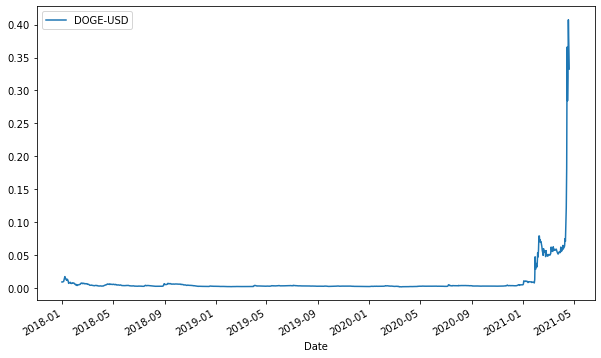

In [102]:
#Plot for Dogecoin till date
mydata.plot(figsize=(10,6))

In [103]:
log_of_returns=np.log(1+mydata.pct_change())
log_of_returns

,DOGE-USD
Date,
2017-12-31,NaN
2018-01-01,-0.007047
2018-01-02,0.026145
2018-01-03,0.018955
2018-01-04,0.034173
...,...
2021-04-15,0.697135
2021-04-16,-0.252695
2021-04-17,0.120221


In [104]:
#Calculating mean and variance of log of returns
mean=log_of_returns.mean()
print(mean)
var=log_of_returns.var()
print(var)

DOGE-USD    0.003005
dtype: float64
DOGE-USD    0.006398
dtype: float64


In [105]:
#Calculating drift which is the first component
#drift = mean - 0.5 * variance

In [106]:
drift=mean-(0.5*var)
drift

DOGE-USD   -0.000194
dtype: float64

In [107]:
stdev=log_of_returns.std()
stdev

DOGE-USD    0.079989
dtype: float64

In [108]:
np.array(drift)
drift.values

array([-0.00019383])

In [109]:
stdev.values

array([0.07998896])

In [110]:
#Calculating volatility of cryptocurrency , which is the second component
days=100
iterations=10

In [111]:
daily_return=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(days,iterations)))
daily_return

array([[0.91263592, 1.11924207, 0.90931568, 1.07057456, 1.01278058,
        1.07888529, 1.05093845, 1.08710914, 0.95300696, 0.99660485],
       [1.15807372, 1.0182624 , 0.95280484, 0.89443983, 1.12644036,
        0.95686215, 1.01403646, 1.10199379, 1.07365476, 1.09875343],
       [1.05633531, 1.06201817, 1.04840704, 1.02357959, 0.97613203,
        0.98701591, 0.94118552, 1.1297371 , 1.02761535, 1.06170688],
       [1.11273777, 0.99210526, 0.96662812, 1.02196886, 1.00323959,
        0.97210367, 0.94010518, 0.9704318 , 1.03430984, 0.95911164],
       [0.98841579, 0.96476778, 1.08365482, 0.95310399, 0.91852784,
        0.90617696, 0.97935798, 1.07544413, 0.90434796, 0.9955126 ],
       [0.92915073, 1.13836405, 0.90545252, 0.98178805, 1.00833049,
        1.15088107, 0.96111095, 1.16964825, 1.03474638, 0.98080865],
       [1.01805079, 0.81654496, 0.98572837, 1.26111723, 0.96851751,
        0.95393138, 0.94917749, 0.8888105 , 1.03217761, 0.9914715 ],
       [0.99947803, 0.95913738, 0.9923207

In [112]:
recent_price=mydata.iloc[-1]
recent_price

DOGE-USD    0.332441
Name: 2021-04-20 00:00:00, dtype: float64

In [113]:
predicted_price=np.zeros_like(daily_return)

In [114]:
predicted_price[0]=recent_price

In [115]:
for day in range(1,days):
    predicted_price[day]=predicted_price[day-1]*daily_return[day]

In [116]:
predicted_price

array([[0.33244112, 0.33244112, 0.33244112, 0.33244112, 0.33244112,
        0.33244112, 0.33244112, 0.33244112, 0.33244112, 0.33244112],
       [0.38499132, 0.33851229, 0.31675151, 0.29734858, 0.3744751 ,
        0.31810032, 0.33710742, 0.36634805, 0.35692699, 0.36527082],
       [0.40667993, 0.35950621, 0.33208451, 0.30435994, 0.36553714,
        0.31397008, 0.31728062, 0.41387699, 0.36678366, 0.38781054],
       [0.45252812, 0.356668  , 0.32100223, 0.31104638, 0.36672133,
        0.30521147, 0.29827716, 0.40163939, 0.37936794, 0.37195361],
       [0.44728594, 0.34410179, 0.34785561, 0.29645954, 0.33684375,
        0.2765756 , 0.29212011, 0.43194072, 0.34308062, 0.3702845 ],
       [0.41559605, 0.39171311, 0.31496674, 0.29106044, 0.33964982,
        0.31830562, 0.28075984, 0.50521871, 0.35500143, 0.36317825],
       [0.42309789, 0.31985136, 0.31047165, 0.36706133, 0.3289568 ,
        0.30364172, 0.26649092, 0.4490437 , 0.36642453, 0.36008088],
       [0.42287705, 0.3067814 , 0.3080874

The plot of predicted prices (for next 100 days) of DOGECOIN by performing 10 simulations 


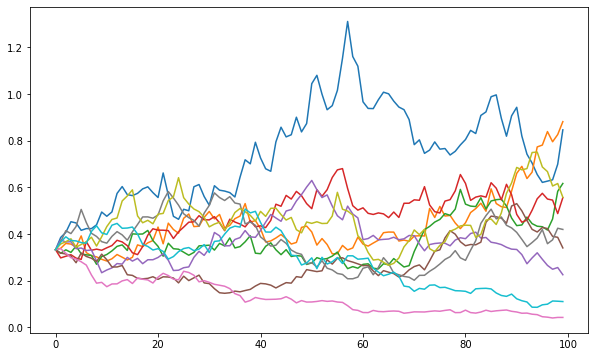

In [117]:
print("The plot of predicted prices (for next 100 days) of DOGECOIN by performing 10 simulations ")
plt.figure(figsize=(10,6))
plt.plot(predicted_price);

In [118]:
#Predicting Dogecoin prices for next 6 months(180 days)

In [119]:
days=180

In [120]:
daily_return=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(days,iterations)))
predicted_price=np.zeros_like(daily_return)
predicted_price[0]=recent_price
for day in range(1,days):
    predicted_price[day]=predicted_price[day-1]*daily_return[day]
predicted_price

array([[0.33244112, 0.33244112, 0.33244112, ..., 0.33244112, 0.33244112,
        0.33244112],
       [0.38799876, 0.31107852, 0.33926723, ..., 0.38525818, 0.33330093,
        0.28596927],
       [0.41670902, 0.31653329, 0.39633412, ..., 0.3847974 , 0.36963553,
        0.30794933],
       ...,
       [0.45875618, 0.6452399 , 0.74987218, ..., 0.40052019, 0.03998642,
        0.71328713],
       [0.36976614, 0.68577873, 0.75653454, ..., 0.38870029, 0.04082571,
        0.77825834],
       [0.35332712, 0.6983558 , 0.81883888, ..., 0.45618563, 0.04271392,
        0.84847243]])

The plot of predicted prices (for next 180 days) of DOGECOIN by performing 10 simulations 


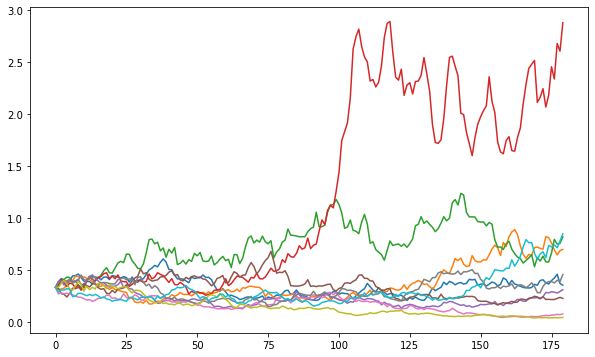

In [121]:
print("The plot of predicted prices (for next 180 days) of DOGECOIN by performing 10 simulations ")
plt.figure(figsize=(10,6))
plt.plot(predicted_price);